In [6]:
!pip install --user numpy==1.19.5

  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [2]:
# pickle 저장된 파일 불러오기
import pickle
with open('.train_test.pkl', 'rb') as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

In [3]:
x_train.shape, x_test.shape, y_train.shape

((606, 1, 1000), (152, 1, 1000), (606,))

In [4]:
model=Sequential()
model.add(LSTM(64,input_shape=(x_train.shape[1],x_train.shape[2]),activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

model.compile(loss="mse",optimizer="adam",metrics=['accuracy'])
hist=model.fit(x_train,y_train,epochs=50,batch_size=20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                272640    
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 272,705
Trainable params: 272,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
31/31 [==============================] - 2s 3ms/step - loss: 0.2299 - accuracy: 0.8036
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1807 - accuracy: 0.8251
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1529 - accuracy: 0.8251
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1443 - accuracy: 0.8251
Epoch 5/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.8251
Epoch 6/50
31/31 [====

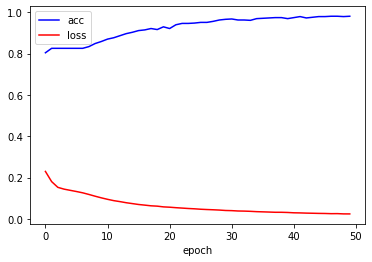

In [5]:
accu = plt.subplot()

accu.plot(hist.history['accuracy'], 'b', label='acc')

accu.set_xlabel('epoch')
accu.legend(loc='upper left')

accu.plot(hist.history['loss'], 'r', label='loss')
accu.set_xlabel('epoch')
accu.legend(loc='upper left')

plt.show()

In [6]:
# 학습모델 저장
model.save("sports_0802")

# loaded_model = load_model("mecab_1")

INFO:tensorflow:Assets written to: sports_0802\assets
